In [1]:
#..\Ahmed project\GANN DATASET\Opt_6B

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt 

from sklearn.preprocessing import MinMaxScaler
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout ,LSTM

In [3]:
data=pd.read_csv("../input/opt-6b-stock/Opt_6B.csv")

In [4]:
data

,Profit,Entry Name,H1,L1,O1,C1,V1,HiLo1,H2,L2,...,I22,I23,I24,I25,I26,I27,I28,I29,I30,I31
0,0,R1 Sell,1.5924,1.5922,1.5924,1.5924,70,1.592250,1.5928,1.5924,...,0,52.018616,-36.363636,1.089286,1,9.940381,0.602561,0,9.146679,Friday
1,0,R1 Buy,1.5939,1.5923,1.5938,1.5931,1447,1.593950,1.5940,1.5923,...,0,36.124563,-88.405797,0.950000,1,-18.540868,0.017070,0,31.143836,Friday
2,0,R1 Sell,1.5887,1.5879,1.5883,1.5886,75,1.587925,1.5888,1.5880,...,1,60.676506,-72.972973,1.083969,0,0.802873,0.309199,1,14.563587,Monday
3,0,R1 Sell,1.5901,1.5887,1.5895,1.5891,865,1.588975,1.5906,1.5894,...,1,54.949556,-65.517241,0.993103,0,-1.106353,0.129379,1,19.139527,Monday
4,0,R1 Buy,1.5899,1.5888,1.5897,1.5891,341,1.590200,1.5899,1.5889,...,0,50.414254,-78.260870,1.012422,1,-7.843250,0.025864,0,16.329333,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,1,R1 Sell,1.2505,1.2471,1.2486,1.2472,916,1.247050,1.2499,1.2480,...,0,58.905807,-49.253731,1.022727,1,7.167600,0.637330,0,19.477545,Monday
5274,0,R1 Sell,1.2493,1.2472,1.2488,1.2482,1368,1.246925,1.2498,1.2478,...,0,46.799983,-54.285714,0.928934,1,8.798321,0.620714,0,21.288598,Monday
5275,0,R1 Sell,1.2469,1.2451,1.2458,1.2454,232,1.244200,1.2461,1.2448,...,1,65.696362,-62.195122,0.908805,1,-8.793473,0.408765,1,19.946562,Tuesday
5276,0,R1 Sell,1.2425,1.2414,1.2422,1.2420,96,1.241175,1.2420,1.2407,...,0,56.405265,-26.785714,1.424107,1,-3.079960,1.000000,0,31.587894,Tuesday


In [5]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(data["C1"].values.reshape(-1,1))

In [6]:
scaled_data.shape

(5278, 1)

In [7]:
prediction_days=45

In [8]:
x_train=[]
y_train=[]

In [9]:
for x in range(prediction_days,len(scaled_data)-720):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [10]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train ,(x_train.shape[0], x_train.shape[1], 1))

In [11]:
model=Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)


2022-07-18 02:44:01.157115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 02:44:01.322946: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 02:44:01.324192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 02:44:01.327067: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/25


2022-07-18 02:44:10.878319: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


142/142 [==============================] - 9s 10ms/step - loss: 0.0179
Epoch 2/25
142/142 [==============================] - 1s 11ms/step - loss: 0.0036
Epoch 3/25
142/142 [==============================] - 2s 12ms/step - loss: 0.0036
Epoch 4/25
142/142 [==============================] - 1s 10ms/step - loss: 0.0034
Epoch 5/25
142/142 [==============================] - 1s 10ms/step - loss: 0.0030
Epoch 6/25
142/142 [==============================] - 1s 10ms/step - loss: 0.0027
Epoch 7/25
142/142 [==============================] - 1s 10ms/step - loss: 0.0026
Epoch 8/25
142/142 [==============================] - 1s 10ms/step - loss: 0.0027
Epoch 9/25
142/142 [==============================] - 2s 14ms/step - loss: 0.0026
Epoch 10/25
142/142 [==============================] - 2s 13ms/step - loss: 0.0023
Epoch 11/25
142/142 [==============================] - 1s 10ms/step - loss: 0.0024
Epoch 12/25
142/142 [==============================] - 2s 11ms/step - loss: 0.0020
Epoch 13/25
142/142 [===

In [12]:
x_test=[]
for x in range(len(scaled_data)-720,len(scaled_data)-45):
    x_test.append(scaled_data[x-prediction_days:x,0])
x_test=np.array(x_test)

In [13]:
actual_prices=scaled_data[len(scaled_data)-720+45:,0]

In [14]:
actual_prices.shape

(675,)

In [15]:
x_test.shape

(675, 45)

In [16]:
x_test=np.reshape(x_test ,(x_test.shape[0], x_test.shape[1], 1))

In [17]:
predicted_prices=model.predict(x_test)
#predicted_prices=scaler.inverse_transform(predicted_prices)

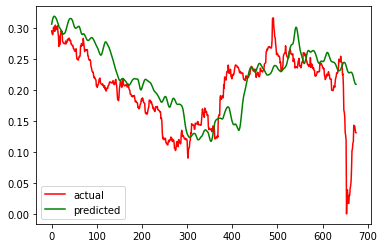

In [18]:
plt.plot(actual_prices,color="red",label="actual")
plt.plot(predicted_prices,color="green",label="predicted")
plt.legend()
plt.show()